# Красивый заголовок
<hr>


Над проектом работали:
Команда № 2 **C.D.C.**

0. Кириленков Кирилл Владимирович

0. Корзун Иван Анатольевич

0. Хван Ок Хи

0. Федеряев Клим Александрович

0. Гайсина Лиана Ильдаровна




<hr>



Для более комфортной работы включите в блокноте GPU и запустите все клетки с начала:

```
Среда выполнения > Сменить среду выполнения > Аппаратный ускоритель > GPU > Сохранить
---
Runtime > Change runtime type > Hardware accelerator > GPU > Save
```

In [2]:
# @title  Устанавливаем модуль aniemore и расширенный модуль из индекса пакетов Python (PyPI)
%pip install -q rich wget wave
# %pip install -q aniemore

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
# Импортируем библиотеки
import wget
import torch
import matplotlib.pyplot as plt
# import seaborn as sns
# from aniemore.recognizers.voice import VoiceRecognizer
# from aniemore.models import HuggingFaceModel
import soundfile as sf   #   pip install pysoundfile
from pathlib import Path

from transformers import HubertForSequenceClassification, Wav2Vec2FeatureExtractor
import torchaudio

import wave
import os
import gc


In [ ]:
# @title Загрузите наш тестовый голосовой файл

voice_url = "https://github.com/aniemore/Aniemore/blob/master/tests/aniemore/recognizers/src/my_voice.ogg?raw=true" # @param {type: "string"}
voices_path: Path = Path('my_voice.ogg')

wget.download(voice_url, str('my_voice.ogg'))

'my_voice.ogg'

In [4]:
# @title Или загрузите ваши тестовые файлы
# @markdown ### Загружайте только аудио файлы в формате 'wav' или 'ogg'
# @markdown ### не короче 30 секунд!

from google.colab import files
result = files.upload()
file_name, value = list(result.items())[0]

if '.ogg' in file_name:
    data, samplerate = sf.read(file_name)
    file_name = file_name[0:-4] + '.wav'
    sf.write(file_name, data, samplerate)
    print(file_name)


Saving test.ogg to test.ogg
test.wav


In [ ]:
import requests

voice_url = "https://github.com/aniemore/Aniemore/blob/master/tests/aniemore/recognizers/src/my_voice.ogg?raw=true"  # URL-адрес файла для загрузки
voices_path = Path('my_voice.ogg')

response = requests.get(voice_url)  # Выполняем GET-запрос к URL

if response.status_code == 200:  # Проверяем успешность запроса
    with open(voices_path, 'wb') as file:
        file.write(response.content)

        print("Файл успешно загружен.")
else:
    print("Не удалось загрузить файл.")

In [5]:
# разрезание файла на N частей.

N = 5 # Number of segments

def segmentator(N_segments: int, f_name: str):
    # file to extract the snippet from
    # path_to_output_file = '/'.join(path_to_file.split('/')[0:-1]) + '/'

    with wave.open(f_name, "rb") as infile:
            # get file data
        nchannels = infile.getnchannels()
        sampwidth = infile.getsampwidth()
        framerate = infile.getframerate()
        frames = infile.getnframes()
        duration = frames / float(framerate)
        print(duration)
        segment = duration / N
        segments = [i * segment for i in range(N + 1)]

        for i in range(len(segments) - 1):

            # set position in wave to start of segment
            infile.setpos(int(segments[i] * framerate))
            # extract data
            data = infile.readframes(int((segments[i + 1] - segments[i]) * framerate))

            # write the extracted data to a new file
            with wave.open(f'{i}_output.wav', 'w') as outfile:
                outfile.setnchannels(nchannels)
                outfile.setsampwidth(sampwidth)
                outfile.setframerate(framerate)
                outfile.setnframes(int(len(data) / sampwidth))
                outfile.writeframes(data)
                print(str(outfile))

segmentator(N, file_name)



16.6335


In [7]:
# Создаем список путей к голосовым файлам
#@markdown Убедитесь, что эта ячейка выводит список поддерживаемых фтоматов (ffmpeg, )


voice_files = Path('.').glob('*?.*?')  # will return Path type
voice_files = list(map(str, voice_files))  # converting Path to str
print(voice_files)

['test.ogg', '0_output.wav', 'test.wav', '1_output.wav']


In [6]:
# @title
model = HuggingFaceModel.Voice.Wav2Vec2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vr = VoiceRecognizer(model, device)
# Output of model
output_dict = dict()

for i in range(N - 1):
    name = f'{i}_output.wav'
    result = vr.recognize(name)
    output_dict[name] = result
    gc.collect()

NameError: ignored

In [8]:
# PLAN B

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-large-ls960-ft")
model = HubertForSequenceClassification.from_pretrained("xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned")
num2emotion = {0: 'neutral', 1: 'angry', 2: 'positive', 3: 'sad', 4: 'other'}

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at xbgoose/hubert-speech-emotion-recognition-russian-dusha-finetuned and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametri

In [10]:
filepath = "1_output.wav"

waveform, sample_rate = torchaudio.load(filepath, normalize=True)
transform = torchaudio.transforms.Resample(sample_rate, 16000)
waveform = transform(waveform)

inputs = feature_extractor(
        waveform,
        sampling_rate=feature_extractor.sampling_rate,
        return_tensors="pt",
        padding=True,
        max_length=16000 * 10,
        truncation=True
    )



logits = model(inputs['input_values'][0]).logits
del(inputs)
del(transform)
print(logits)
predictions = torch.argmax(logits, dim=1)
predicted_emotion = num2emotion[predictions.numpy()[0]]
print(predicted_emotion)

tensor([[ 1.4948,  3.2782,  1.3996, -2.9511, -3.6657]],
       grad_fn=<AddmmBackward0>)
angry


In [11]:
print(os.listdir())
#for k, v in output_dict.items():
    #print(f'{k}: {v}')

# print(output_dict)

['.config', '4_output.wav', '3_output.wav', '0_output.wav', '2_output.wav', 'neutral.wav', '1_output.wav', 'sample_data']


# Обработка результатов и визуализация

In [ ]:
result = {   # Удалить позже
    'anger': 0.2,
    'disgust': 0.8,
    'enthusiasm': 0.2,
    'fear': 0.1,
    'happiness': 0.1,
    'neutral': 0.1,
    'sadness': 0.1
}

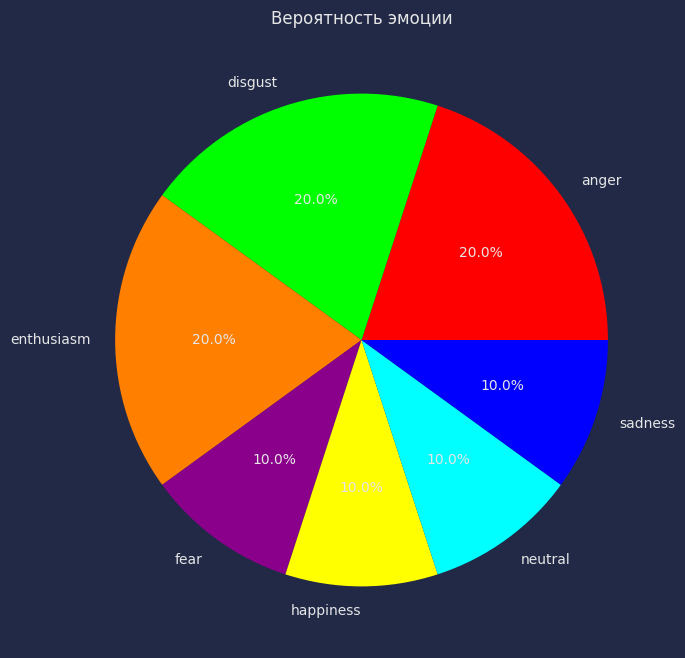

In [ ]:
# Получаем эмоции и вероятности из словаря результатов
emotions = list(result.keys())
probabilities = list(result.values())


# Определяем пороговое значение для отсечения
def filter_emotions(emotions, probabilities, threshold=0.01):
    filtered_emotions = []
    filtered_probabilities = []
    for emotion, probability in zip(emotions, probabilities):
        if probability >= threshold:
            filtered_emotions.append(emotion)
            filtered_probabilities.append(probability)
    return filtered_emotions, filtered_probabilities


filtered_emotions, filtered_probabilities = filter_emotions(emotions, probabilities)

# Определяем цветовую палитру
color_mapping = {
    'anger': '#FF0000',
    'disgust': '#00FF00',
    'enthusiasm': '#FF7F00',
    'fear': '#8B008B',
    'happiness': '#FFFF00',
    'neutral': '#00FFFF',
    'sadness': '#0000FF'
}
colors = [color_mapping[emotion] for emotion in filtered_emotions]


# Настройки цвета текста
plt.rcParams['text.color'] = '0.9'
plt.rcParams['axes.labelcolor'] = '0.9'
plt.rcParams['xtick.color'] = '0.9'
plt.rcParams['ytick.color'] = '0.9'

# Настройки цвета фона
plt.rcParams['figure.facecolor'] = '#212946'
plt.rcParams['axes.facecolor'] = '#212946'
plt.rcParams['savefig.facecolor'] = '#212946'

# Настройки цвета сетки
plt.rcParams['grid.color'] = '#2A3459'

# Построим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(filtered_probabilities, labels=filtered_emotions, colors=colors, autopct='%1.1f%%')
plt.title('Вероятность эмоции')


# Добавляем заголовок
plt.title('Вероятность эмоции')
plt.show()


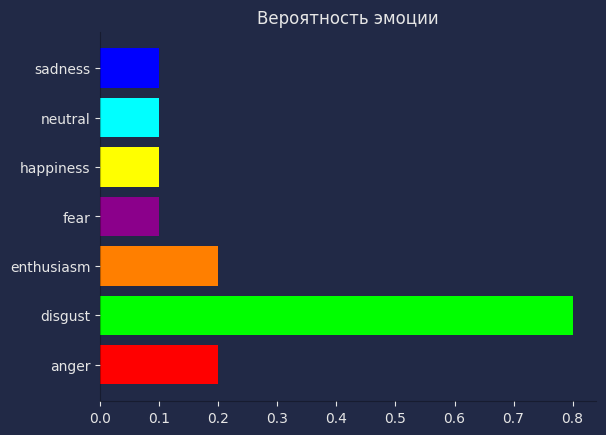

In [ ]:
# Получаем эмоции и вероятности из словаря результатов   # По сути это второй вариант отображения круговой диаграммы

emotions = list(result.keys())
probabilities = list(result.values())

# Определяем пороговое значение для отсечения
def filter_emotions(emotions, probabilities, threshold=0.01):

    filtered_emotions = []
    filtered_probabilities = []
    for emotion, probability in zip(emotions, probabilities):
        if probability >= threshold:
            filtered_emotions.append(emotion)
            filtered_probabilities.append(probability)
    return filtered_emotions, filtered_probabilities

filtered_emotions, filtered_probabilities = filter_emotions(emotions, probabilities)


# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Настройки цвета текста
plt.rcParams['text.color'] = '0.9'
plt.rcParams['axes.labelcolor'] = '0.9'
plt.rcParams['xtick.color'] = '0.9'
plt.rcParams['ytick.color'] = '0.9'

# Настройки цвета фона
plt.rcParams['figure.facecolor'] = '#212946'
plt.rcParams['axes.facecolor'] = '#212946'
plt.rcParams['savefig.facecolor'] = '#212946'

# Настройки цвета сетки
plt.rcParams['grid.color'] = '#2A3459'

# Определяем цветовую палитру
color_mapping = {
    'anger': '#FF0000',
    'disgust': '#00FF00',
    'enthusiasm': '#FF7F00',
    'fear': '#8B008B',
    'happiness': '#FFFF00',
    'neutral': '#00FFFF',
    'sadness': '#0000FF'
}
import numpy as np
colors = [color_mapping[emotion] for emotion in filtered_emotions]



# Построение горизонтальной столбчатой диаграммы с градиентным эффектом
plt.barh(filtered_emotions, filtered_probabilities, color=colors,  )


# Установка заголовка графика
plt.title('Вероятность эмоции')



# Отображение графика
plt.show()

In [ ]:
result = {
    'my_voice.ogg': {
        'anger': 0.00022966109099797904,
        'disgust': 0.7071554064750671,
        'enthusiasm': 0.061652034521102905,
        'fear': 9.3700728029944e-05,
        'happiness': 0.026993600651622e-05,
        'neutral': 0.22958992421627045,
        'sadness': 0.0011990244966000319
    },
    'my_voice (1).ogg': {
        'anger': 0.022966109099797904,
        'disgust': 0.071554064750671,
        'enthusiasm': 0.061652034521102905,
        'fear': 9.3700728029944e-05,
        'happiness': 9.026993600651622e-05,
        'neutral': 0.22958992421627045,
        'sadness': 0.0011990244966000319
    },

    'my_voice (2).ogg': {
        'anger': 0.722966109099797904,
        'disgust': 0.071554064750671,
        'enthusiasm': 0.961652034521102905,
        'fear': 9.3700728029944e-05,
        'happiness': 9.026993600651622e-05,
        'neutral': 0.22958992421627045,
        'sadness': 0.0011990244966000319
    }
}

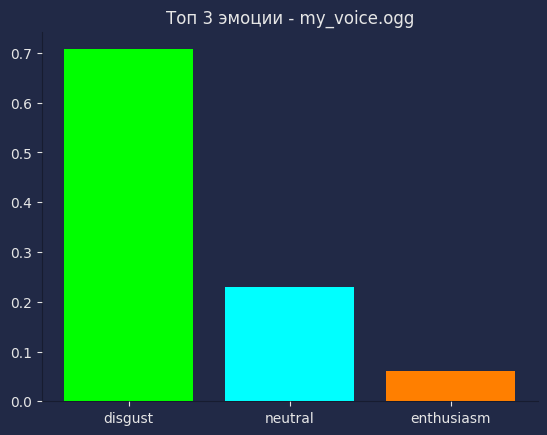

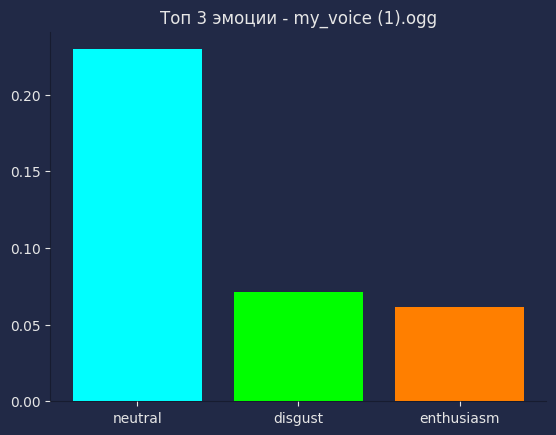

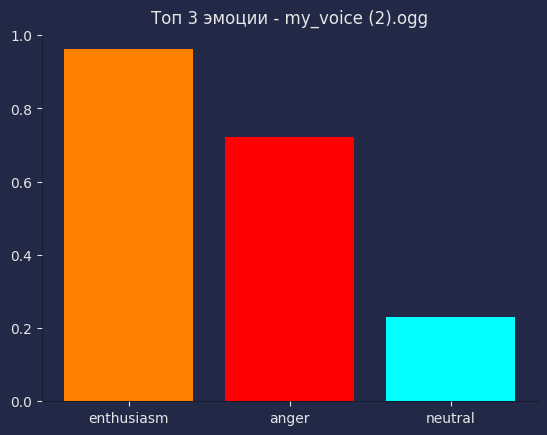

In [ ]:
# Для каждой записи отдельно
for key, value in result.items():
    # Получаем эмоции и вероятности из словаря результатов
    emotions, probabilities = zip(*value.items())


    # Сортируем эмоции по убыванию вероятностей
    sorted_emotions = [emotion for _, emotion in sorted(zip(probabilities, emotions), reverse=True)]
    sorted_probabilities = sorted(probabilities, reverse=True)

    # Выбираем три наибольших значения эмоций
    top_emotions = sorted_emotions[:3]
    top_probabilities = sorted_probabilities[:3]


    colors = [color_mapping[emotion] for emotion in top_emotions]
    # Lighten borders
    plt.gca().spines["top"].set_alpha(0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(0)
    plt.gca().spines["left"].set_alpha(.3)

    # Настройки цвета текста
    plt.rcParams['text.color'] = '0.9'
    plt.rcParams['axes.labelcolor'] = '0.9'
    plt.rcParams['xtick.color'] = '0.9'
    plt.rcParams['ytick.color'] = '0.9'

    # Настройки цвета фона
    plt.rcParams['figure.facecolor'] = '#212946'
    plt.rcParams['axes.facecolor'] = '#212946'
    plt.rcParams['savefig.facecolor'] = '#212946'

    # Настройки цвета сетки
    plt.rcParams['grid.color'] = '#2A3459'

    # Построим гистограмму

    plt.bar(range(len(top_emotions)), top_probabilities, color=colors)
    plt.title(f'Топ 3 эмоции - {key}')
    plt.xticks(range(len(top_emotions)), top_emotions)
    plt.show()
    print()

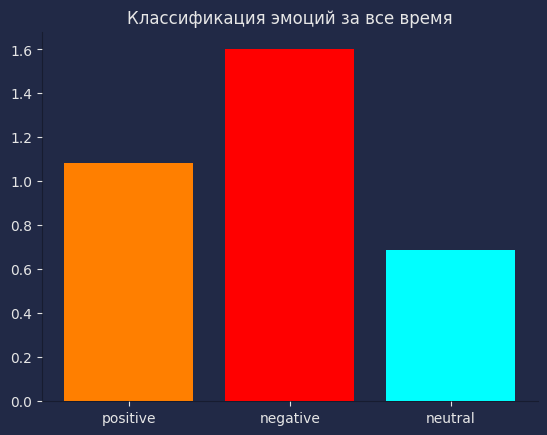

In [ ]:
# Создаем словарь для подсчета эмоций
emotion_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Подсчитываем количество каждой эмоции
for res in result.values():
    for emotion, value in res.items():
        if emotion in ['happiness', 'enthusiasm']:
            emotion_counts['positive'] += value
        elif emotion in ['anger', 'disgust', 'fear', 'sadness']:
            emotion_counts['negative'] += value
        elif emotion == 'neutral':
            emotion_counts['neutral'] += value


emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())
# Визуализация результатов в виде графика

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Настройки цвета текста
plt.rcParams['text.color'] = '0.9'
plt.rcParams['axes.labelcolor'] = '0.9'
plt.rcParams['xtick.color'] = '0.9'
plt.rcParams['ytick.color'] = '0.9'

# Настройки цвета фона
plt.rcParams['figure.facecolor'] = '#212946'
plt.rcParams['axes.facecolor'] = '#212946'
plt.rcParams['savefig.facecolor'] = '#212946'

# Настройки цвета сетки
plt.rcParams['grid.color'] = '#2A3459'

plt.bar(emotions, counts, color=colors)

plt.title('Классификация эмоций за все время')
plt.show()


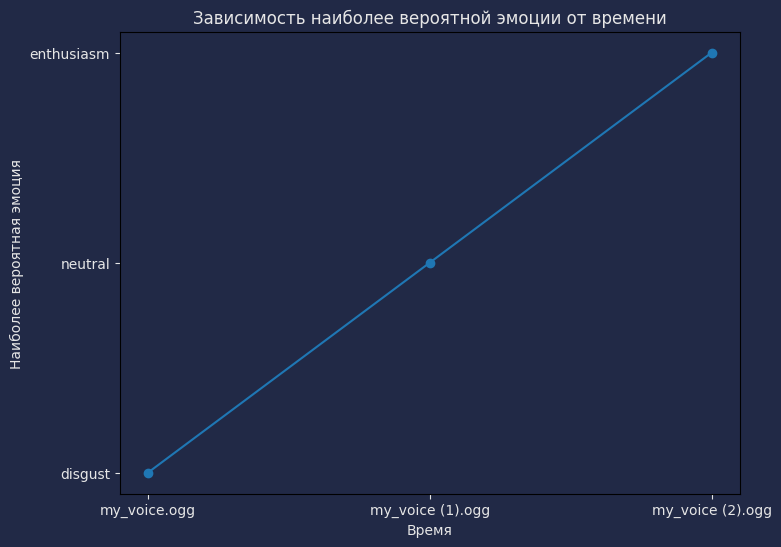

In [ ]:
# ХРЕНЬ
# result - это словарь с результатами эмоций и их вероятностями
time_values = []
emotion_values = []

for key, value in result.items():
    # Получаем эмоции и вероятности из словаря результатов
    emotions, probabilities = zip(*value.items())

    # Сортируем эмоции по убыванию вероятностей
    sorted_emotions = [emotion for _, emotion in sorted(zip(probabilities, emotions), reverse=True)]
    sorted_probabilities = sorted(probabilities, reverse=True)

    # Выбираем наиболее вероятную эмоцию
    top_emotion = sorted_emotions[0]
    top_probability = sorted_probabilities[0]

    # Добавляем значения времени и эмоции в соответствующие списки
    time_values.append(key)
    emotion_values.append(top_emotion)

# Построим линейную зависимость наиболее вероятной эмоции от времени
plt.figure(figsize=(8, 6))
plt.plot(time_values, emotion_values, marker='o')
plt.xlabel('Время')
plt.ylabel('Наиболее вероятная эмоция')
plt.title('Зависимость наиболее вероятной эмоции от времени')
plt.show()

In [ ]:

result = vr.recognize(voice_files[0], return_single_label=True)
aprint(result)

Some weights of the model checkpoint at aniemore/wavlm-emotion-russian-resd were not used when initializing WavLMForSequenceClassification: ['wavlm.encoder.pos_conv_embed.conv.weight_g', 'wavlm.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at aniemore/wavlm-emotion-russian-resd and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wavlm.encoder.pos_conv_embed.conv.param

disgust

In [ ]:

result = vr.recognize(voice_files, return_single_label=True)
print(result)

Some weights of the model checkpoint at aniemore/wavlm-emotion-russian-resd were not used when initializing WavLMForSequenceClassification: ['wavlm.encoder.pos_conv_embed.conv.weight_v', 'wavlm.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing WavLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at aniemore/wavlm-emotion-russian-resd and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wavlm.encoder.pos_conv_embed.conv.param

{
    'my_voice (2).ogg': 'disgust',
    'my_voice (6).ogg': 'disgust',
    'my_voice (3).ogg': 'disgust',
    'my_voice (5).ogg': 'disgust',
    'my_voice (4).ogg': 'disgust',
    'my_voice (1).ogg': 'disgust',
    'my_voice.ogg': 'disgust'
}